In [1]:
#Imports

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedShuffleSplit

from __future__ import print_function

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, log_loss

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


print(__doc__)

Automatically created module for IPython interactive environment


/Users/imac/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
test = pd.read_csv('/Users/imac/Documents/Tijdelijk/Machine Learning/EindProject/ml-project/data/test.csv', delimiter=',')
train = pd.read_csv('/Users/imac/Documents/Tijdelijk/Machine Learning/EindProject/ml-project/data/train.csv', delimiter=',')

In [3]:
def encode(train, test):
    le = LabelEncoder().fit(train.species) 
    labels = le.transform(train.species)           
    classes = list(le.classes_)                    
    test_ids = test.id                             
    
    train = train.drop(['species', 'id'], axis=1)  
    test = test.drop(['id'], axis=1)
    
    return train, labels, test, test_ids, classes

train, labels, test, test_ids, classes = encode(train, test)

In [4]:
sss = StratifiedShuffleSplit(labels, 10, test_size=0.2, random_state=23)

for train_index, test_index in sss:
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

In [17]:
import pandas as pd
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

classifiers = [
    KNeighborsClassifier(n_neighbors=1, weights='uniform'),
    DecisionTreeClassifier(splitter='best', criterion='gini', min_samples_leaf=1),
    AdaBoostClassifier(n_estimators=73, learning_rate=0.7)]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 90.9091%
Log Loss: 3.13988876317
DecisionTreeClassifier
****Results****
Accuracy: 63.1313%
Log Loss: 12.7339933173
AdaBoostClassifier
****Results****
Accuracy: 9.5960%
Log Loss: 4.08316277444


In [18]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    AdaBoostClassifier(),]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log_original = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log_original = log_original.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 88.8889%
Log Loss: 1.57550751299
DecisionTreeClassifier
****Results****
Accuracy: 63.1313%
Log Loss: 12.7339933173
AdaBoostClassifier
****Results****
Accuracy: 4.5455%
Log Loss: 4.19873722896


In [15]:
%matplotlib inline

In [7]:
print(log)
print(log_original)

               Classifier   Accuracy   Log Loss
0    KNeighborsClassifier  90.909091   3.139889
0  DecisionTreeClassifier  63.131313  12.426268
               Classifier   Accuracy   Log Loss
0    KNeighborsClassifier  88.888889   1.575508
0  DecisionTreeClassifier  65.151515  12.036240


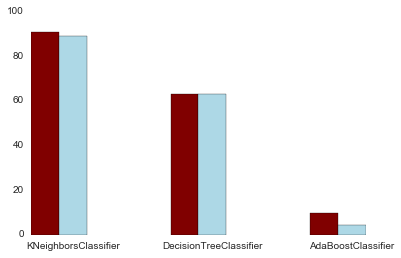

In [19]:
import pylab as plt

x = log['Classifier'].tolist()
y = log['Accuracy'].tolist()
x_original = log_original['Classifier'].tolist()
y_original = log_original['Accuracy'].tolist()

Number = [0.9, 1.9, 2.9]
NumberOriginal = [1.1, 2.1, 3.1]

ax = plt.subplot(111)
ax.bar(Number, y, width=0.2, color='maroon', align='center')
plt.xticks(Number, x)

ax.bar(NumberOriginal , y_original, width=0.2, color='lightblue', align='center')
plt.xticks(NumberOriginal, x_original)

ax.set_axis_bgcolor('white')

plt.show()